# **FrodoBots Gaming Dataset**

---


FrodoBots is an open world video driving game where gamers remotely control sidewalk robots in different cities. The game objective is to complete the pre-defined navigation missions. As gamers play the game, it generates a valuable and multifaceted robotics dataset, which we have chosen to open source for the benefit of researchers and enthusiasts alike. The Frodobots Gaming Dataset is a diverse collection of IMU, GPS, control data, camera footage, and audio recordings collected from sidewalk robots.

### **Dataset Overview**

1. **Control data**: This includes information about the robot's control inputs captured at a frequency of 10Hz.

2. **GPS data**: This includes latitude, longitude, and timestamp information for each data point collected during the robot drives at a frequency of 1Hz.

3. **IMU (Inertial Measurement Unit) data**: This provides 9-degree of freedom sensor data, including acceleration (captured at 100Hz), gyroscope (captured at 1Hz), and compass ride information (captured at 1Hz), along with timestamp data.

4. **Rear camera video**: This offers video footage captured by the robot's rear-facing camera at 20 frames per second (FPS) with a resolution of 800x600.

5. **Front camera video**: This consists of video footage captured by the robot's front-facing camera at 20 FPS with a resolution of 480x480.

6. **Microphone**: This includes audio recordings captured by the robot's microphone, with a sample rate of 48000Hz.

7. **Speaker**: This incorporates audio recordings of the robot's speaker output, also with a sample rate of 48000Hz.

###  <div class="alert alert-info">1. Control data</div>

In [ ]:
# Code to download file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

import pandas as pd

Control data example

In [ ]:
# Read the control file
id = '1giozf_GTv3uA86_Tf6HdNNqsUY1_hYVL'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('control_20230131070153.csv')
control_df = pd.read_csv('control_20230131070153.csv')
control_df.head()

speed  angular  rpm_1  rpm_2  rpm_3  rpm_4     timestamp
0    0.0      0.0      1      1      0      0  1.675149e+09
1    0.0      0.0      1      1      0      0  1.675149e+09
2    0.0      0.0      1      1      0      0  1.675149e+09
3    0.0      0.0      1      1      0      0  1.675149e+09
4    0.0      0.0      1      1      0      0  1.675149e+09

Combined all control data into a single table for further analysis

In [ ]:
# combined all control files into one big table
id = '1J3KO56g87VSSStElxyQZDbG4QaunbT-u'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('combined_control.csv')
combined_control_df = pd.read_csv('combined_control.csv')

# Calculate "actual_speed" and add to "combined_control_df"
combined_control_df['actual_speed'] = (combined_control_df['rpm_1'] + combined_control_df['rpm_2'] + combined_control_df['rpm_3'] + combined_control_df['rpm_4']) / 4 * 3.14 * 0.125 * 60.0 / 1000.0
combined_control_df

speed  angular  rpm_1  rpm_2  rpm_3  rpm_4     timestamp  \
0          0.45      0.0    0.0    0.0    0.0    0.0  1.680601e+09   
1          0.00      0.0    0.0    0.0    0.0    0.0  1.680601e+09   
2          0.00      0.0    0.0    0.0    0.0    0.0  1.680601e+09   
3          0.00      0.0    0.0    0.0    0.0    0.0  1.680601e+09   
4          0.00      0.0    0.0    0.0    0.0    0.0  1.680601e+09   
...         ...      ...    ...    ...    ...    ...           ...   
19619346   0.00      0.0    0.0    0.0    0.0    0.0  1.684464e+09   
19619347   0.00      0.0    0.0    0.0    0.0    0.0  1.684464e+09   
19619348   0.00      0.0    0.0    0.0    0.0    0.0  1.684464e+09   
19619349   0.00      0.0    0.0    0.0    0.0    0.0  1.684464e+09   
19619350    NaN      NaN    NaN    NaN    NaN    NaN           NaN   

                Robot_ID         Session  actual_speed  
0         frodobot2e6a30  20230404102851           0.0  
1         frodobot2e6a30  20230404102851           0.0  
2         frodobot2e6a30  20230404102851           0.0  
3         frodobot2e6a30  20230404102851           0.0  
4         frodobot2e6a30  20230404102851           0.0  
...                  ...             ...           ...  
19619346  frodobot31cdee  20230519033727           0.0  
19619347  frodobot31cdee  20230519033727           0.0  
19619348  frodobot31cdee  20230519033727           0.0  
19619349  frodobot31cdee  20230519033727           0.0  
19619350  frodobot31cdee  20230519033727           NaN  

[19619351 rows x 10 columns]

#### Total Duration for Each City

In [ ]:
# location data
id = '11q6qf4UOcNjfuPg8QDa0wnC_Kz09I_PC'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('location.csv')
location_df = pd.read_csv('location.csv')
location_df['city'].unique()

array(['London', 'Bern', 'Liu Zhou Shi', 'California', 'Madrid',
       'Stockholm', 'Vienna', 'Berlin', 'Wuhan', 'Taipei', 'Singapore',
       'Belgium', 'San Diego', 'Bobigny', 'Paris'], dtype=object)

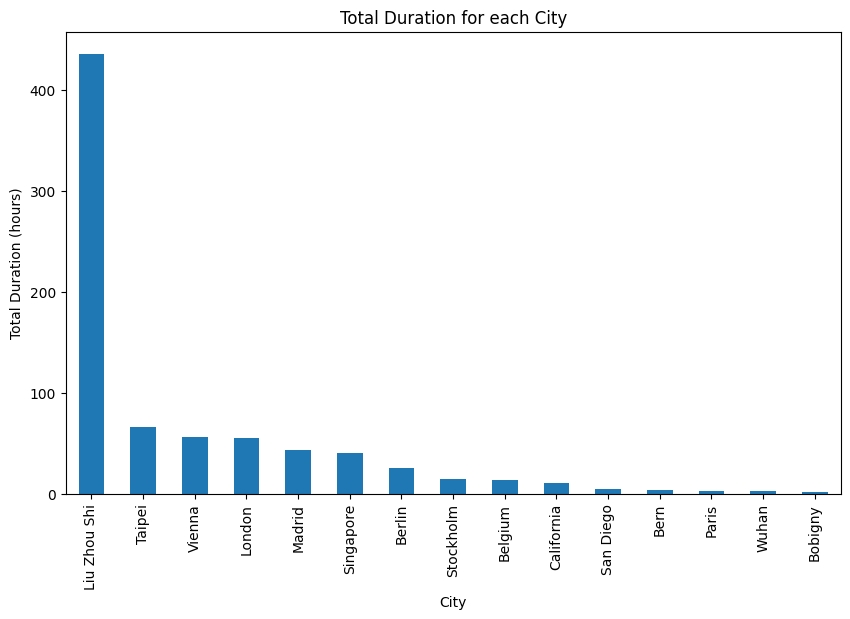

In [ ]:
import matplotlib.pyplot as plt

# Create a new DataFrame that records the start and end time of each unique session
session_df = combined_control_df.groupby('Session').agg({'timestamp': ['min', 'max'], 'Robot_ID': 'first'})

# Flatten the MultiIndex in columns
session_df.columns = ['_'.join(col).strip() for col in session_df.columns.values]

# Reset the index
session_df.reset_index(inplace=True)

# Convert the 'timestamp_min' and 'timestamp_max' columns to datetime format
session_df['timestamp_min'] = pd.to_datetime(session_df['timestamp_min'], unit='s')
session_df['timestamp_max'] = pd.to_datetime(session_df['timestamp_max'], unit='s')

# Calculate the duration for each of these unique sessions
session_df['session_hours'] = (session_df['timestamp_max'] - session_df['timestamp_min']).dt.total_seconds() / 3600  # convert seconds to hours

# Merge session data with location data
merged_df = pd.merge(session_df, location_df, left_on='Robot_ID_first', right_on='bot_id', how='left')

# Group by city and sum the session_hours
total_duration_per_city = merged_df.groupby('city')['session_hours'].sum()

# Sort the cities by total duration
total_duration_per_city_sorted = total_duration_per_city.sort_values(ascending=False)

# Create a bar plot of total duration per city
total_duration_per_city_sorted.plot(kind='bar', figsize=(10, 6))
plt.xlabel('City')
plt.ylabel('Total Duration (hours)')
plt.title('Total Duration for each City')
plt.show()

#### Session Duration

In [ ]:
# calculate session duration
combined_control_df['timestamp'] = pd.to_datetime(combined_control_df['timestamp'], unit='s')  # convert unix timestamp to datetime
grouped = combined_control_df.groupby('Session')
session_duration = grouped['timestamp'].max() - grouped['timestamp'].min()

# convert duration to seconds for easier analysis and comparison
session_duration_in_seconds = session_duration.dt.total_seconds()
# convert duration to minutes for easier analysis and comparison
session_duration_in_minutes = session_duration.dt.total_seconds() / 60

# convert Series to DataFrame and rename the column
session_duration_df = session_duration_in_minutes.to_frame().reset_index()
session_duration_df.columns = ['Session', 'Session Minutes']

In [ ]:
# Calculate the total number of sessions
total_sessions = len(session_duration_df)

# Calculate the total number of hours
total_hours = session_duration_df['Session Minutes'].sum() / 60

print(f'Total number of sessions: {total_sessions}')
print(f'Total duration in hours: {total_hours}')

Total number of sessions: 4189
Total duration in hours: 776.6236083313778


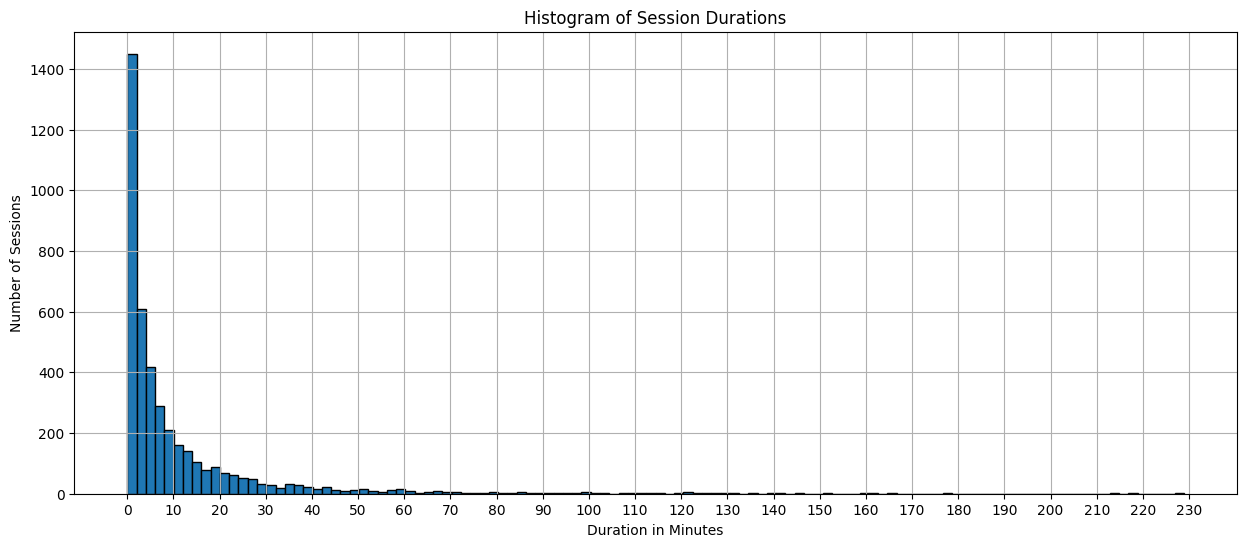

In [ ]:
import numpy as np

# Estimate the maximum session duration in minutes
max_duration = session_duration_df['Session Minutes'].max()

plt.figure(figsize=(15, 6))  # Adjust the figure size

# Plot the histogram with one bin per 2 minutes
session_duration_df['Session Minutes'].hist(bins=int(max_duration / 2), edgecolor='black')

# Add x-axis ticks
plt.xticks(np.arange(0, max_duration + 10, 10))  # +10 in max_duration to ensure the last tick is included

plt.title("Histogram of Session Durations")
plt.xlabel("Duration in Minutes")
plt.ylabel("Number of Sessions")
plt.show()

#### Speed

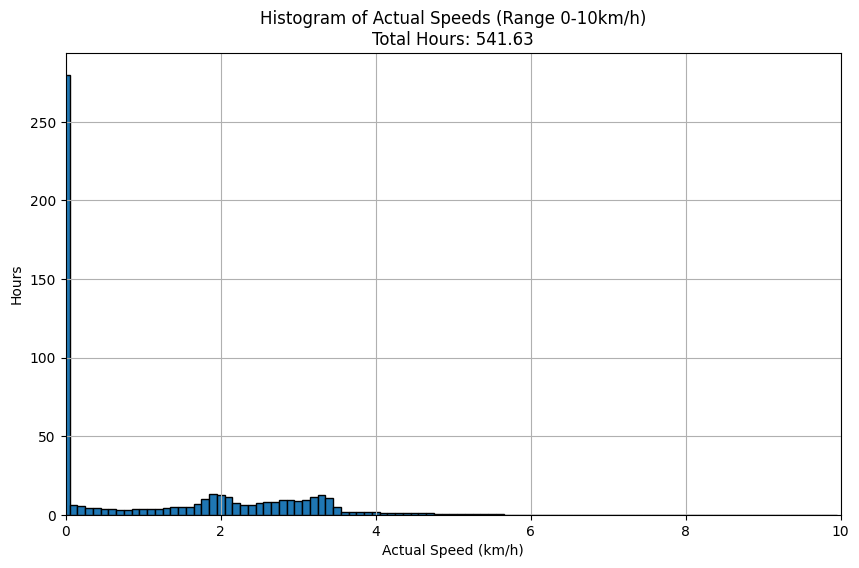

In [ ]:
# Define the number of bins
num_bins = 100

# Calculate histogram
counts, bin_edges = np.histogram(combined_control_df['actual_speed'], bins=num_bins, range=(0, 10))

# Convert counts to hours
counts_in_hours = (counts * 0.1) / 3600

# Calculate total hours
total_hours = counts_in_hours.sum()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(bin_edges[:-1], counts_in_hours, width = 0.1, edgecolor='black')
plt.xlabel('Actual Speed (km/h)')
plt.ylabel('Hours')
plt.title(f'Histogram of Actual Speeds (Range 0-10km/h)\nTotal Hours: {total_hours:.2f}')
plt.grid(True)

# Set x-axis range
plt.xlim(0, 10)

plt.show()


Range 0.1-10 km/h

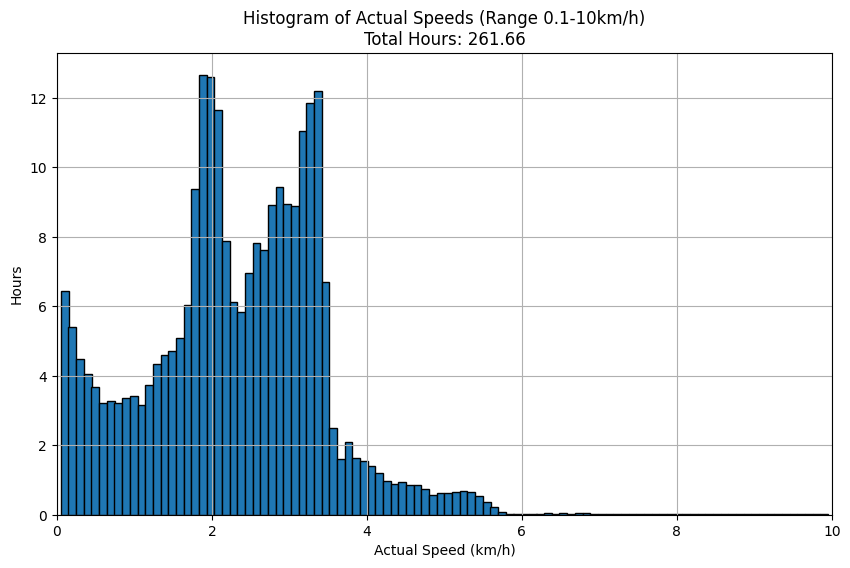

In [ ]:
# Calculate histogram
counts, bin_edges = np.histogram(combined_control_df['actual_speed'], bins=num_bins, range=(0.1, 10))

# Convert counts to hours
counts_in_hours = (counts * 0.1) / 3600

# Calculate total hours
total_hours = counts_in_hours.sum()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(bin_edges[:-1], counts_in_hours, width = 0.1, edgecolor='black')
plt.xlabel('Actual Speed (km/h)')
plt.ylabel('Hours')
plt.title(f'Histogram of Actual Speeds (Range 0.1-10km/h)\nTotal Hours: {total_hours:.2f}')
plt.grid(True)

# Set x-axis range
plt.xlim(0, 10)

plt.show()

###  <div class="alert alert-info">2. GPS data</div>

In [ ]:
import json

id = '1-iMF-1safOoLwmq4H9wAM-V3HOdg4BOQ'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('gps_streams.csv')
gps = pd.read_csv('gps_streams.csv')

# Replace the payload column with the parsed JSON objects
gps['payload'] = gps['payload'].apply(json.loads)

# Extract individual keys from the payload and create new columns for each key
payload_keys = ['ride_id', 'device_ref_id', 'latitude', 'speed_in_mh', 'bot_id', 'timestamp', 'longitude']
for key in payload_keys:
    gps[key] = gps['payload'].apply(lambda x: x.get(key, {}).get('N', x.get(key, {}).get('S')))

# Drop the payload column as it's no longer needed
gps.drop(columns=['payload'], inplace=True)

gps.head()

device_ref_id       timestamp ride_id   latitude speed_in_mh bot_id  \
0  frodobot_901238  1674458965.285    1895  24.313808           0     17   
1  frodobot_901238  1674458966.343    1895  24.313808           0     17   
2  frodobot_901238  1674458967.412    1895  24.313808           0     17   
3  frodobot_901238  1674458968.484    1895  24.313808           0     17   
4  frodobot_901238  1674458969.592    1895  24.313808           0     17   

    longitude  
0  109.412193  
1  109.412193  
2  109.412193  
3  109.412193  
4  109.412193

###  <div class="alert alert-info">3. IMU data</div>

In [ ]:
id = '1fKEpyZFehVPLD3ZAiYE21poxAL5fMN1c'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('imu_streams.csv')
imu_data = pd.read_csv('imu_streams.csv')

# Function to parse JSON string and return a flattened dictionary
def parse_json(json_str):
    data = json.loads(json_str)
    flat_data = {}
    for key, value in data.items():
        if isinstance(value, dict):
            for sub_key, sub_value in value.items():
                flat_data[f'{key}_{sub_key}'] = sub_value
        else:
            flat_data[key] = value
    return flat_data

# Apply the parse_json function to the 'payload' column
imu_data_parsed = imu_data['payload'].apply(parse_json)

# Create new columns from the parsed JSON data
imu_data_expanded = pd.concat([imu_data, pd.json_normalize(imu_data_parsed)], axis=1)

# Drop the original 'payload' column
imu_data_expanded.drop(columns=['payload'], inplace=True)

imu_data_expanded.head()


device_ref_id      timestamp ride_id_N  device_ref_id_S  \
0         901238  1674458966257      1895  frodobot_901238   
1         901238  1674458967269      1895  frodobot_901238   
2         901238  1674458968258      1895  frodobot_901238   
3         901238  1674458969259      1895  frodobot_901238   
4         901238  1674458970270      1895  frodobot_901238   

                                           compass_L  \
0  [{'L': [{'N': '233'}, {'N': '-614'}, {'N': '-3...   
1  [{'L': [{'N': '233'}, {'N': '-614'}, {'N': '-3...   
2  [{'L': [{'N': '233'}, {'N': '-615'}, {'N': '-3...   
3  [{'L': [{'N': '233'}, {'N': '-613'}, {'N': '-3...   
4  [{'L': [{'N': '232'}, {'N': '-613'}, {'N': '-3...   

                                     accelerometer_L bot_id_N     timestamp_N  \
0  [{'L': [{'N': '-0.075'}, {'N': '0.512'}, {'N':...       17  1674458965.284   
1  [{'L': [{'N': '-0.075'}, {'N': '0.511'}, {'N':...       17  1674458966.342   
2  [{'L': [{'N': '-0.075'}, {'N': '0.51'}, {'N': ...       17  1674458967.412   
3  [{'L': [{'N': '-0.075'}, {'N': '0.512'}, {'N':...       17  1674458968.484   
4  [{'L': [{'N': '-0.074'}, {'N': '0.512'}, {'N':...       17  1674458969.592   

                                         gyroscope_L  
0  [{'L': [{'N': '-2.229'}, {'N': '-1.847'}, {'N'...  
1  [{'L': [{'N': '-2.29'}, {'N': '-1.794'}, {'N':...  
2  [{'L': [{'N': '-2.252'}, {'N': '-1.855'}, {'N'...  
3  [{'L': [{'N': '-2.298'}, {'N': '-1.916'}, {'N'...  
4  [{'L': [{'N': '-2.244'}, {'N': '-1.847'}, {'N'...

###  <div class="alert alert-info">4. Rear camera video</div>

convert to mp4 using ffmpeg

In [ ]:
# specify folder ID
folder_id = '1DzavOWjdxbP-_jOgbWclJlEB3G5pr93T'

# list all files in the folder
file_list = drive.ListFile({'q': "'{}' in parents".format(folder_id)}).GetList()

# download all files
for file in file_list:
    print('downloading file: {}'.format(file['title']))
    file.GetContentFile(file['title'])  # downloads to the current directory

downloading file: gps_streams.csv
downloading file: imu_streams.csv
downloading file: bot901238-front-cam.mp4
downloading file: control_20230131070153.csv
downloading file: 17c3ed6bb94f8b240cad559c67bbb3f2_frodobot_901238__uid_s_1000__uid_e_video.m3u8
downloading file: 17c3ed6bb94f8b240cad559c67bbb3f2_frodobot_901238__uid_s_1000__uid_e_video_20230131085136776.ts
downloading file: 17c3ed6bb94f8b240cad559c67bbb3f2_frodobot_901238__uid_s_1000__uid_e_audio_20230131085142794.ts
downloading file: 17c3ed6bb94f8b240cad559c67bbb3f2_frodobot_901238__uid_s_1000__uid_e_audio.m3u8
downloading file: 17c3ed6bb94f8b240cad559c67bbb3f2_frodobot_901238__uid_s_1000__uid_e_audio_20230131085127784.ts
downloading file: 17c3ed6bb94f8b240cad559c67bbb3f2_frodobot_901238__uid_s_1000__uid_e_video_20230131085118776.ts
downloading file: 17c3ed6bb94f8b240cad559c67bbb3f2_frodobot_901238__uid_s_1000__uid_e_audio_20230131085112764.ts
downloading file: 17c3ed6bb94f8b240cad559c67bbb3f2_frodobot_901238__uid_s_1000__uid_e_

In [ ]:
# id = '1m51Dv_IZZ1ouaJjbovmK5daC_BB8AEHi'
# downloaded = drive.CreateFile({'id':id})
# downloaded.GetContentFile('17c3ed6bb94f8b240cad559c67bbb3f2_frodobot_901238__uid_s_1001__uid_e_video.m3u8')
input_rearcam = '17c3ed6bb94f8b240cad559c67bbb3f2_frodobot_901238__uid_s_1001__uid_e_video.m3u8'
output_rearcam = "20230131070153_bot901238_rearcam.mp4"

# convert to MP4
!ffmpeg -i "{input_rearcam}" -vcodec copy "{output_rearcam}"

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

show video details using ffprobe

In [ ]:
# show front camera details
!ffprobe -show_packets "{input_rearcam}"

Streaming output truncated to the last 5000 lines.
duration=4218
duration_time=0.046867
size=2963
pos=326406540
flags=__
[SIDE_DATA]
side_data_type=MPEGTS Stream ID
[/SIDE_DATA]
[/PACKET]
[PACKET]
codec_type=video
stream_index=0
pts=382014810
pts_time=4244.609000
dts=382014810
dts_time=4244.609000
duration=4218
duration_time=0.046867
size=3065
pos=326409736
flags=__
[SIDE_DATA]
side_data_type=MPEGTS Stream ID
[/SIDE_DATA]
[/PACKET]
[PACKET]
codec_type=video
stream_index=0
pts=382019400
pts_time=4244.660000
dts=382019400
dts_time=4244.660000
duration=4218
duration_time=0.046867
size=3153
pos=326413308
flags=__
[SIDE_DATA]
side_data_type=MPEGTS Stream ID
[/SIDE_DATA]
[/PACKET]
[PACKET]
codec_type=video
stream_index=0
pts=382023180
pts_time=4244.702000
dts=382023180
dts_time=4244.702000
duration=4218
duration_time=0.046867
size=5540
pos=326416692
flags=__
[SIDE_DATA]
side_data_type=MPEGTS Stream ID
[/SIDE_DATA]
[/PACKET]
[PACKET]
codec_type=video
stream_index=0
pts=382027230
pts_time=4244

###  <div class="alert alert-info">5. Front camera video</div>

convert to mp4 using ffmpeg

In [ ]:
# id = '1-MYirXRDL2xOtaJmx7qdof-UeoGxT06t'
# downloaded = drive.CreateFile({'id':id})
# downloaded.GetContentFile('17c3ed6bb94f8b240cad559c67bbb3f2_frodobot_901238__uid_s_1000__uid_e_video.m3u8')
input_frontcam = '17c3ed6bb94f8b240cad559c67bbb3f2_frodobot_901238__uid_s_1000__uid_e_video.m3u8'
output_frontcam = "20230131070153_bot901238_frontcam.mp4"

# convert to MP4
!ffmpeg -i "{input_frontcam}" -vcodec copy "{output_frontcam}"

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

show details using ffprobe

In [ ]:
# show front camera details
!ffprobe -show_packets "{input_frontcam}"

Streaming output truncated to the last 5000 lines.
duration=4500
duration_time=0.050000
size=10427
pos=1323454952
flags=__
[SIDE_DATA]
side_data_type=MPEGTS Stream ID
[/SIDE_DATA]
[/PACKET]
[PACKET]
codec_type=video
stream_index=0
pts=591100470
pts_time=6567.783000
dts=591100470
dts_time=6567.783000
duration=4500
duration_time=0.050000
size=7543
pos=1323466232
flags=__
[SIDE_DATA]
side_data_type=MPEGTS Stream ID
[/SIDE_DATA]
[/PACKET]
[PACKET]
codec_type=video
stream_index=0
pts=591104970
pts_time=6567.833000
dts=591104970
dts_time=6567.833000
duration=4500
duration_time=0.050000
size=7895
pos=1323474504
flags=__
[SIDE_DATA]
side_data_type=MPEGTS Stream ID
[/SIDE_DATA]
[/PACKET]
[PACKET]
codec_type=video
stream_index=0
pts=591109470
pts_time=6567.883000
dts=591109470
dts_time=6567.883000
duration=4500
duration_time=0.050000
size=10871
pos=1323482964
flags=__
[SIDE_DATA]
side_data_type=MPEGTS Stream ID
[/SIDE_DATA]
[/PACKET]
[PACKET]
codec_type=video
stream_index=0
pts=591113970
pts_tim

In [ ]:
import subprocess

# Run ffprobe and get output in JSON format
command = f'ffprobe -v quiet -print_format json -show_packets "{input_frontcam}"'
output = subprocess.check_output(command, shell=True, stderr=subprocess.STDOUT)

# Parse JSON output
output_json = json.loads(output)

# Convert packets to a DataFrame
packets = output_json['packets']
df = pd.DataFrame(packets)

# Optional: filter only video packets
video_packets = df[df['codec_type'] == 'video']

video_packets

codec_type  stream_index        pts     pts_time        dts  \
0           video             0          0     0.000000          0   
1           video             0       1350     0.015000       1350   
2           video             0       2160     0.024000       2160   
3           video             0       2700     0.030000       2700   
4           video             0       4950     0.055000       4950   
...           ...           ...        ...          ...        ...   
129676      video             0  592481970  6583.133000  592481970   
129677      video             0  592486470  6583.183000  592486470   
129678      video             0  592490970  6583.233000  592490970   
129679      video             0  592495470  6583.283000  592495470   
129680      video             0  592499970  6583.333000  592499970   

           dts_time   size         pos flags  \
0          0.000000  20547         564    K_   
1          0.015000    828       22372    __   
2          0.024000    252       23312    __   
3          0.030000     77       23688    __   
4          0.055000     27       24252    __   
...             ...    ...         ...   ...   
129676  6583.133000   6597  1326614668    __   
129677  6583.183000  10463  1326621812    __   
129678  6583.233000  10745  1326633092    __   
129679  6583.283000   8605  1326644936    __   
129680  6583.333000   7719  1326654148    __   

                                  side_data_list  duration duration_time  
0       [{'side_data_type': 'MPEGTS Stream ID'}]       NaN           NaN  
1       [{'side_data_type': 'MPEGTS Stream ID'}]       NaN           NaN  
2       [{'side_data_type': 'MPEGTS Stream ID'}]       NaN           NaN  
3       [{'side_data_type': 'MPEGTS Stream ID'}]       NaN           NaN  
4       [{'side_data_type': 'MPEGTS Stream ID'}]       NaN           NaN  
...                                          ...       ...           ...  
129676  [{'side_data_type': 'MPEGTS Stream ID'}]    4500.0      0.050000  
129677  [{'side_data_type': 'MPEGTS Stream ID'}]    4500.0      0.050000  
129678  [{'side_data_type': 'MPEGTS Stream ID'}]    4500.0      0.050000  
129679  [{'side_data_type': 'MPEGTS Stream ID'}]    4500.0      0.050000  
129680                                       NaN    4500.0      0.050000  

[129681 rows x 12 columns]

###  <div class="alert alert-info">6. Microphone</div>

In [ ]:
input_microphone_filename = "17c3ed6bb94f8b240cad559c67bbb3f2_frodobot_901238__uid_s_1000__uid_e_audio.m3u8"
output_microphone_filename = "20230131070153_bot901238_audio_microphone.mp3"

!ffmpeg -i "{input_microphone_filename}" -acodec libmp3lame -ab 128k "{output_microphone_filename}"

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
!ffprobe -show_packets "{input_microphone_filename}"

Streaming output truncated to the last 5000 lines.
duration_time=0.021333
size=149
pos=63409392
flags=K_
[SIDE_DATA]
side_data_type=MPEGTS Stream ID
[/SIDE_DATA]
[/PACKET]
[PACKET]
codec_type=audio
stream_index=0
pts=593148780
pts_time=6590.542000
dts=593148780
dts_time=6590.542000
duration=1920
duration_time=0.021333
size=149
pos=63409580
flags=K_
[SIDE_DATA]
side_data_type=MPEGTS Stream ID
[/SIDE_DATA]
[/PACKET]
[PACKET]
codec_type=audio
stream_index=0
pts=593150580
pts_time=6590.562000
dts=593150580
dts_time=6590.562000
duration=1920
duration_time=0.021333
size=150
pos=63409768
flags=K_
[SIDE_DATA]
side_data_type=MPEGTS Stream ID
[/SIDE_DATA]
[/PACKET]
[PACKET]
codec_type=audio
stream_index=0
pts=593152380
pts_time=6590.582000
dts=593152380
dts_time=6590.582000
duration=1920
duration_time=0.021333
size=149
pos=63409956
flags=K_
[SIDE_DATA]
side_data_type=MPEGTS Stream ID
[/SIDE_DATA]
[/PACKET]
[PACKET]
codec_type=audio
stream_index=0
pts=593154180
pts_time=6590.602000
dts=593154180


###  <div class="alert alert-info">7. Speaker</div>

In [ ]:
input_speaker_filename = "17c3ed6bb94f8b240cad559c67bbb3f2_frodobot_901238__uid_s_1839338052__uid_e_audio.m3u8"
output_speaker_filename = "20230131070153_bot901238_audio_speaker.mp3"

!ffmpeg -i "{input_speaker_filename}" -acodec libmp3lame -ab 128k "{output_speaker_filename}"

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
!ffprobe -show_packets "{input_speaker_filename}"

Streaming output truncated to the last 5000 lines.
duration_time=0.021333
size=149
pos=166380
flags=K_
[SIDE_DATA]
side_data_type=MPEGTS Stream ID
[/SIDE_DATA]
[/PACKET]
[PACKET]
codec_type=audio
stream_index=0
pts=1562400
pts_time=17.360000
dts=1562400
dts_time=17.360000
duration=1920
duration_time=0.021333
size=150
pos=166568
flags=K_
[SIDE_DATA]
side_data_type=MPEGTS Stream ID
[/SIDE_DATA]
[/PACKET]
[PACKET]
codec_type=audio
stream_index=0
pts=1564200
pts_time=17.380000
dts=1564200
dts_time=17.380000
duration=1920
duration_time=0.021333
size=149
pos=166756
flags=K_
[SIDE_DATA]
side_data_type=MPEGTS Stream ID
[/SIDE_DATA]
[/PACKET]
[PACKET]
codec_type=audio
stream_index=0
pts=1566000
pts_time=17.400000
dts=1566000
dts_time=17.400000
duration=1920
duration_time=0.021333
size=149
pos=166944
flags=K_
[SIDE_DATA]
side_data_type=MPEGTS Stream ID
[/SIDE_DATA]
[/PACKET]
[PACKET]
codec_type=audio
stream_index=0
pts=1567800
pts_time=17.420000
dts=1567800
dts_time=17.420000
duration=1920
durat